In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import h5py
import seaborn as sns

from sklearn import preprocessing, cluster
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, mean_absolute_error
from sklearn.manifold import TSNE
import tensorflow as tf

from lightgbm import LGBMClassifier, LGBMRegressor

plt.style.use("../KD_style.mplstyle")


In [38]:
tf

<module 'tensorflow' from 'C:\\Users\\Philip\\AppData\\Roaming\\Python\\Python311\\site-packages\\tensorflow\\__init__.py'>

In [2]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        df = pd.DataFrame(f[name][:], dtype=np.float64)
        df = df.drop("index", axis = 1)
        return df

train = load_data('./train')
train = train.sample(frac=1, random_state= 42)
final_test  = load_data('./test')


In [34]:
print(train.keys())

Index(['eventNumber', 'runNumber', 'actualInteractionsPerCrossing',
       'averageInteractionsPerCrossing', 'correctedActualMu',
       'correctedAverageMu', 'correctedScaledActualMu',
       'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks',
       ...
       'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3', 'p_E7x11_Lr0',
       'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0',
       'p_E7x7_Lr1'],
      dtype='object', length=165)


In [36]:
use_keys = ['actualInteractionsPerCrossing',
'averageInteractionsPerCrossing',
'correctedActualMu',
'correctedAverageMu',
'correctedScaledActualMu',
'correctedScaledAverageMu',
'NvtxReco',
'p_nTracks',
'p_pt_track',
'p_eta',
'p_phi',
'p_charge',
'p_qOverP',
'p_z0',
'p_d0',
'p_sigmad0',
'p_d0Sig',
'p_EptRatio',
'p_dPOverP',
'p_z0theta',
'p_etaCluster',
'p_phiCluster',
'p_eCluster',
'p_rawEtaCluster',
'p_rawPhiCluster',
'p_rawECluster',
'p_eClusterLr0',
'p_eClusterLr1',
'p_eClusterLr2',
'p_eClusterLr3',
'p_etaClusterLr1',
'p_etaClusterLr2',
'p_phiClusterLr2',
'p_eAccCluster',
'p_f0Cluster',
'p_etaCalo',
'p_phiCalo',
'p_eTileGap3Cluster',
'p_cellIndexCluster',
'p_phiModCalo',
'p_etaModCalo',
'p_dPhiTH3',
'p_R12',
'p_fTG3',
'p_weta2',
'p_Reta',
'p_Rphi',
'p_Eratio',
'p_f1',
'p_f3',
'p_Rhad',
'p_Rhad1',
'p_deltaEta1',
'p_deltaPhiRescaled2',
'p_TRTPID',
'p_TRTTrackOccupancy',
'p_numberOfInnermostPixelHits',
'p_numberOfPixelHits',
'p_numberOfSCTHits',
'p_numberOfTRTHits',
'p_numberOfTRTXenonHits',
'p_chi2',
'p_ndof',
'p_SharedMuonTrack',
'p_E7x7_Lr2',
'p_E7x7_Lr3',
'p_E_Lr0_HiG',
'p_E_Lr0_LowG',
'p_E_Lr0_MedG',
'p_E_Lr1_HiG',
'p_E_Lr1_LowG',
'p_E_Lr1_MedG',
'p_E_Lr2_HiG',
'p_E_Lr2_LowG',
'p_E_Lr2_MedG',
'p_E_Lr3_HiG',
'p_E_Lr3_LowG',
'p_E_Lr3_MedG',
'p_ambiguityType',
'p_asy1',
'p_author',
'p_barys1',
'p_core57cellsEnergyCorrection',
'p_deltaEta0',
'p_deltaEta2',
'p_deltaEta3',
'p_deltaPhi0',
'p_deltaPhi1',
'p_deltaPhi2',
'p_deltaPhi3',
'p_deltaPhiFromLastMeasurement',
'p_deltaPhiRescaled0',
'p_deltaPhiRescaled1',
'p_deltaPhiRescaled3',
'p_e1152',
'p_e132',
'p_e235',
'p_e255',
'p_e2ts1',
'p_ecore',
'p_emins1',
'p_etconeCorrBitset',
'p_ethad',
'p_ethad1',
'p_f1core',
'p_f3core',
'p_maxEcell_energy',
'p_maxEcell_gain',
'p_maxEcell_time',
'p_maxEcell_x',
'p_maxEcell_y',
'p_maxEcell_z',
'p_nCells_Lr0_HiG',
'p_nCells_Lr0_LowG',
'p_nCells_Lr0_MedG',
'p_nCells_Lr1_HiG',
'p_nCells_Lr1_LowG',
'p_nCells_Lr1_MedG',
'p_nCells_Lr2_HiG',
'p_nCells_Lr2_LowG',
'p_nCells_Lr2_MedG',
'p_nCells_Lr3_HiG',
'p_nCells_Lr3_LowG',
'p_nCells_Lr3_MedG',
'p_pos',
'p_pos7',
'p_poscs1',
'p_poscs2',
'p_ptconeCorrBitset',
'p_ptconecoreTrackPtrCorrection',
'p_r33over37allcalo',
'p_topoetconeCorrBitset',
'p_topoetconecoreConeEnergyCorrection',
'p_topoetconecoreConeSCEnergyCorrection',
'p_weta1',
'p_widths1',
'p_widths2',
'p_wtots1',
'p_e233',
'p_e237',
'p_e277',
'p_e2tsts1',
'p_ehad1',
'p_emaxs1',
'p_fracs1',
'p_DeltaE',
'p_E3x5_Lr0',
'p_E3x5_Lr1',
'p_E3x5_Lr2',
'p_E3x5_Lr3',
'p_E5x7_Lr0',
'p_E5x7_Lr1',
'p_E5x7_Lr2',
'p_E5x7_Lr3',
'p_E7x11_Lr0',
'p_E7x11_Lr1',
'p_E7x11_Lr2',
'p_E7x11_Lr3',
'p_E7x7_Lr0',
'p_E7x7_Lr1']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train[use_keys], train["Truth"], test_size=0.2, random_state=42)
X_train_sub = X_train.iloc[:5000]
y_train_sub = y_train.iloc[:5000]

In [42]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def bayes_optimize_params(X_train, X_test, y_train, y_test, classifier, param_dict_range, rng):
    
    def opt_func(**kwargs):
        for kw in kwargs:
            kwargs[kw] = int(kwargs[kw])
        model = classifier(random_state = rng, **kwargs).fit(X_train, y_train)
        return roc_auc_score(y_test, model.predict_proba(X_test).T[1])
    
    optimizer = BayesianOptimization(f = opt_func,
                                     pbounds = param_dict_range,
                                     random_state = rng,
                                     verbose=0)
    optimizer.maximize(n_iter = 25)    
    params = {}
    for param in optimizer.max["params"]:
        params[param] = int(optimizer.max["params"][param])
    return params

def bayes_optimize_params_cv(X, y, classifier, param_dict_range, rng):
    
    def opt_func(**kwargs):
        
        for kw in kwargs:
            kwargs[kw] = int(kwargs[kw])
        score = cross_val_score(classifier(**kwargs), X, y, scoring = "roc_auc", cv = 4).mean()
        return score
    
    optimizer = BayesianOptimization(f = opt_func,
                                     pbounds = param_dict_range,
                                     random_state = rng,
                                     verbose=2)
    optimizer.maximize(n_iter = 30)    
    params = {}
    for param in optimizer.max["params"]:
        params[param] = int(optimizer.max["params"][param])
    return params
    
def optimize_tree_sk_classifier(X, y, classifier, param_dict_range, pre_process = None, rng = 42, test_size = 0.2, max_fi_size = 10**6):
    if pre_process:
        X = pd.DataFrame(pre_process.fit_transform(X), columns=X.keys())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rng)
    params = bayes_optimize_params_cv(X, y, classifier, param_dict_range, rng)
    print(params)
    model = classifier(random_state = rng, **params).fit(X_train, y_train)
    
    fig, ax = plt.subplots()
    RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test).T[1], name = "hopefully good", ax = ax)
    default_model = classifier(random_state = rng).fit(X_train, y_train)
    RocCurveDisplay.from_predictions(y_test, default_model.predict_proba(X_test).T[1], name = "untuned", ax = ax)
    plt.show()
    
    r1 = permutation_importance(model, X, y, n_repeats=5, random_state=0)
    important_keys1 = []
    for i in r1.importances_mean.argsort()[::-1]:
        if r1.importances_mean[i] - 2 * r1.importances_std[i] > 0:
                print(f"{model.feature_name_[i]:<8}",
                f"{r1.importances_mean[i]:.4f}",
                f" +/- {r1.importances_std[i]:.4f}")
                important_keys1.append(model.feature_name_[i])
    return params, important_keys1

def bayes_optimize_params_cv_regression(X, y, regressor, param_dict_range, rng):
    
    def opt_func(**kwargs):
        
        for kw in kwargs:
            kwargs[kw] = int(kwargs[kw])
        score = cross_val_score(regressor(**kwargs), X, y, scoring = "neg_mean_absolute_error", cv = 5).mean()
        return score
    
    optimizer = BayesianOptimization(f = opt_func,
                                     pbounds = param_dict_range,
                                     random_state = rng,
                                     verbose=2)
    optimizer.maximize(n_iter = 30)    
    params = {}
    for param in optimizer.max["params"]:
        params[param] = int(optimizer.max["params"][param])
    return params

def optimize_tree_sk_regression(X, y, regressor, param_dict_range, pre_process = None, rng = 42, test_size = 0.2, max_fi_size = 10**6):
    if pre_process:
        X = pd.DataFrame(pre_process.fit_transform(X), columns=X.keys())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rng)
    params = bayes_optimize_params_cv_regression(X, y, regressor, param_dict_range, rng)
    print(params)
    model = regressor(random_state = rng, **params).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(mean_absolute_error(y_test, y_pred))
    model_un = regressor(random_state = rng).fit(X_train, y_train)
    y_pred = model_un.predict(X_test)
    print(mean_absolute_error(y_test, y_pred))

    # fig, ax = plt.subplots()
    # RocCurveDisplay.from_predictions(y_test, model.predict_proba(X_test).T[1], name = "hopefully good", ax = ax)
    # default_model = regressor(random_state = rng).fit(X_train, y_train)
    # RocCurveDisplay.from_predictions(y_test, default_model.predict_proba(X_test).T[1], name = "untuned", ax = ax)
    
    r1 = permutation_importance(model, X, y, n_repeats=5, random_state=0)
    important_keys1 = []
    for i in r1.importances_mean.argsort()[::-1]:
        if r1.importances_mean[i] - 2 * r1.importances_std[i] > 0:
                print(f"{model.feature_name_[i]:<8}",
                f"{r1.importances_mean[i]:.4f}",
                f" +/- {r1.importances_std[i]:.4f}")
                important_keys1.append(model.feature_name_[i])
    return params, important_keys1

param_dict_range = {"min_child_samples": (0, 400), 
                    "num_leaves": (2,300)}
params, imp_keys = optimize_tree_sk_regression(train[use_keys][train["Truth"].values == 1], train["p_truth_E"][train["Truth"].values == 1].values, LGBMRegressor, param_dict_range)

|   iter    |  target   | min_ch... | num_le... |
-------------------------------------------------
| 1         | -6.266e+0 | 149.8     | 285.3     |
| 2         | -6.236e+0 | 292.8     | 180.4     |
| 3         | -6.14e+03 | 62.41     | 48.49     |
| 4         | -6.282e+0 | 23.23     | 260.1     |
| 5         | -6.243e+0 | 240.4     | 213.0     |
| 6         | -6.958e+0 | 159.6     | 2.0       |
| 7         | -6.131e+0 | 64.58     | 48.74     |
| 8         | -6.189e+0 | 79.14     | 108.1     |
| 9         | -6.23e+03 | 138.0     | 182.7     |
| 10        | -6.246e+0 | 321.1     | 273.1     |
| 11        | -6.227e+0 | 0.3702    | 147.4     |
| 12        | -6.26e+03 | 389.5     | 199.1     |
| 13        | -6.238e+0 | 351.6     | 100.5     |
| 14        | -6.278e+0 | 399.1     | 16.97     |
| 15        | -6.235e+0 | 64.85     | 181.9     |
| 16        | -6.261e+0 | 399.9     | 298.7     |
| 17        | -6.259e+0 | 240.9     | 300.0     |
| 18        | -6.222e+0 | 215.5     | 139.4     |


In [43]:
param_dict_range = {"min_child_samples": (0, 200), 
                    "num_leaves": (2,200)}

params2, imp_keys2 = optimize_tree_sk_regression(train[imp_keys[:40]][train["Truth"].values == 1], train["p_truth_E"][train["Truth"].values == 1].values, LGBMRegressor, param_dict_range)

|   iter    |  target   | min_ch... | num_le... |
-------------------------------------------------
| 1         | -6.231e+0 | 74.91     | 190.2     |
| 2         | -6.211e+0 | 146.4     | 120.5     |
| 3         | -6.115e+0 | 31.2      | 32.89     |
| 4         | -6.179e+0 | 11.62     | 173.5     |
| 5         | -6.211e+0 | 120.2     | 142.2     |
| 6         | -6.954e+0 | 0.0       | 2.0       |
| 7         | -6.113e+0 | 30.92     | 34.44     |
| 8         | -6.115e+0 | 64.24     | 37.91     |
| 9         | -6.157e+0 | 54.78     | 83.51     |
| 10        | -6.171e+0 | 104.2     | 71.92     |
| 11        | -6.185e+0 | 109.8     | 15.79     |
| 12        | -6.157e+0 | 15.04     | 118.4     |
| 13        | -6.186e+0 | 59.74     | 133.0     |
| 14        | -6.179e+0 | 156.5     | 51.22     |
| 15        | -6.954e+0 | 171.9     | 2.0       |
| 16        | -6.199e+0 | 191.2     | 88.84     |
| 17        | -6.231e+0 | 200.0     | 155.2     |
| 18        | -6.247e+0 | 147.8     | 199.0     |


In [52]:
self_imp_keys = np.array(sorted(zip(LGBMRegressor(**params).fit(train[use_keys][train["Truth"].values == 1], train["p_truth_E"][train["Truth"].values == 1].values).feature_importances_, use_keys), reverse=True))[:,1][:20]

In [72]:
print(params2)

{'min_child_samples': 30, 'num_leaves': 34}


In [53]:
print(self_imp_keys)

['p_eCluster' 'p_deltaEta2' 'p_deltaPhiRescaled2' 'p_deltaEta1'
 'p_EptRatio' 'p_deltaPhi2' 'p_qOverP' 'p_d0' 'p_pt_track' 'p_sigmad0'
 'p_nCells_Lr2_HiG' 'p_d0Sig' 'p_nCells_Lr1_HiG' 'p_nTracks' 'p_DeltaE'
 'p_ecore' 'p_deltaPhi1' 'p_Rphi' 'p_e2tsts1'
 'p_core57cellsEnergyCorrection']


In [56]:
print(cross_val_score(LGBMRegressor(**params2), train[self_imp_keys][train["Truth"].values == 1], train["p_truth_E"][train["Truth"].values == 1].values, cv = 5, scoring = "neg_mean_absolute_error").mean())
print(cross_val_score(LGBMRegressor(**params2), train[imp_keys2][train["Truth"].values == 1], train["p_truth_E"][train["Truth"].values == 1].values, cv = 5, scoring = "neg_mean_absolute_error").mean())

-6206.2895921467125
-6113.42651993202


In [69]:
lbgm_reg_model = LGBMRegressor(**params2).fit(train[imp_keys2][train["Truth"].values == 1], train["p_truth_E"][train["Truth"].values == 1].values)
final = lbgm_reg_model.predict(final_test[imp_keys2])

In [71]:
final_df = pd.DataFrame(final).to_csv("Regression_PhilipKofoed-Djursner_lightgbm.txt", header = None)
with open("Regression_PhilipKofoed-Djursner_lightgbm_VariableList.txt", "w") as f:
    for key in imp_keys2[:15]:
        f.write(f"{key}\n")

In [3]:
cluster_keys = ["p_sigmad0", "p_deltaEta1", "p_deltaPhiRescaled2", "p_ptconecoreTrackPtrCorrection", "p_Rphi"]

In [57]:
X_clust1 = preprocessing.RobustScaler().fit_transform(final_test[cluster_keys])

In [15]:
tsne1 = TSNE().fit_transform(X_clust1)

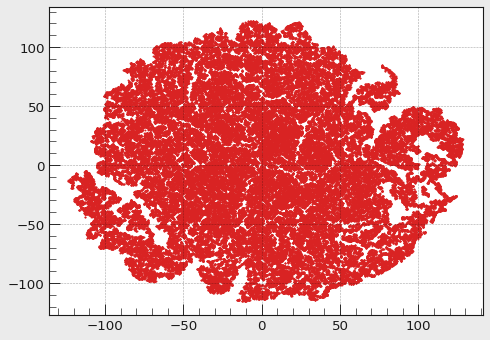

In [20]:
plt.scatter(*tsne1.T, s=2)

In [58]:
db1 = cluster.DBSCAN(0.5).fit(X_clust1)


In [62]:
print(db1)

DBSCAN()


In [63]:
pd.DataFrame(db1.labels_).to_csv("Clustering_PhilipKofoed-Djursner_DBSCAN.txt", header = None)

In [26]:
for db in [db1]:
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("Estimated number of clusters: %d" % n_clusters_)
    print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 6
Estimated number of noise points: 2


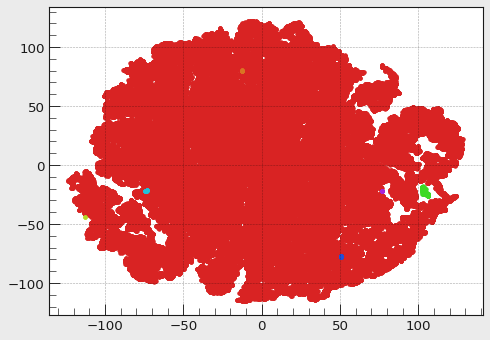

In [28]:
for label in set(db.labels_):
    i = np.where(label == db.labels_)
    plt.scatter(tsne1.T[0][i], tsne1.T[1][i])

ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

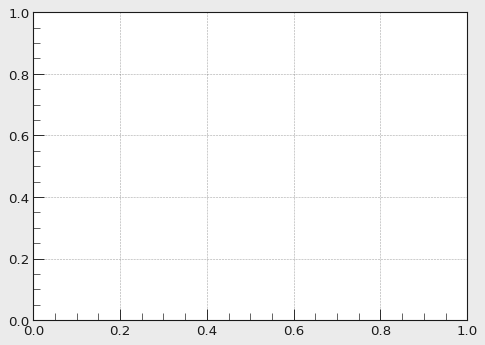

In [27]:
plt.scatter(*tsne1.T, s=2, color = db.labels_)

In [67]:
lgbm_reg_model = LGBMRegressor(**params2).fit(train[imp_keys2][train["Truth"].values == 1], train["p_truth_E"][train["Truth"].values == 1].values)


In [68]:
preprocessing.RobustScaler().fit_transform(train[use_keys])

array([[ 7.60738488e-02,  6.24435435e-01,  1.67445286e-03, ...,
         0.00000000e+00,  4.97397535e-01,  1.34756876e-02],
       [-1.12259315e-01, -1.07804525e+00,  2.72831929e-01, ...,
         0.00000000e+00, -4.19248364e-02,  6.24068813e-01],
       [ 1.08887822e+00, -2.23371930e-01, -2.80186721e-01, ...,
         0.00000000e+00,  2.03826394e-01,  1.26885800e+00],
       ...,
       [-4.82124193e-01,  6.07888244e-01,  1.19206577e+00, ...,
         0.00000000e+00,  5.08322766e-01, -4.31850725e-01],
       [-4.50487388e-01,  3.01350813e-01, -2.71452031e+00, ...,
         0.00000000e+00, -1.13322571e+00, -4.16456058e-01],
       [ 2.59883003e+00, -5.46137683e-01,  1.59466679e-01, ...,
         0.00000000e+00, -1.27192104e+00,  5.42857541e-01]])

In [72]:
from tensorflow.keras.layers import Input, BatchNormalization, Dense
from tensorflow.keras.optimizers.experimental import SGD
n_inputs = 15
n_hidden1 = 300
n_hidden2 = 200
n_hidden3 = 100
n_outputs = 1
batch_norm_momentum = 0.9
learning_rate = 0.1
init = tf.keras.initializers.VarianceScaling(scale=1.0, mode='fan_in')
centropy = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# network structure
nn_reg = tf.keras.models.Sequential([
  Dense(n_inputs),
  BatchNormalization(),
  Dense(n_hidden1, activation =tf.nn.relu),
  BatchNormalization(),
  Dense(n_hidden2, activation =tf.nn.relu),
  BatchNormalization(),
  Dense(n_outputs, activation =tf.nn.softmax),
])

nn_reg.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer=SGD(), metrics=['accuracy'])

use_keys = ["p_sigmad0", "p_deltaEta1", "p_deltaPhiRescaled2", "p_ptconecoreTrackPtrCorrection", "p_Rphi", "p_Reta", "p_ethad", "p_nTracks", "p_E7x11_Lr3", "p_numberOfPixelHits", "p_deltaPhiFromLastMeasurement", "p_d0", "p_ambiguityType", "p_d0Sig", "p_dPOverP"]

n_epochs = 100
batch_size = 2000
X_train, X_test, y_train, y_test = train_test_split(preprocessing.StandardScaler().fit_transform(train[use_keys]), train["Truth"].values, test_size=0.2, random_state=42)
history = nn_reg.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/100
65/65 [==============================] - 3s 31ms/step - loss: 0.5656 - accuracy: 0.7477 - val_loss: 0.5656 - val_accuracy: 0.7477
Epoch 2/100
65/65 [==============================] - 2s 23ms/step - loss: 0.5656 - accuracy: 0.7477 - val_loss: 0.5656 - val_accuracy: 0.7477
Epoch 3/100
65/65 [==============================] - 2s 26ms/step - loss: 0.5656 - accuracy: 0.7477 - val_loss: 0.5656 - val_accuracy: 0.7477
Epoch 4/100
65/65 [==============================] - 2s 24ms/step - loss: 0.5656 - accuracy: 0.7477 - val_loss: 0.5656 - val_accuracy: 0.7477
Epoch 5/100
65/65 [==============================] - 2s 25ms/step - loss: 0.5656 - accuracy: 0.7477 - val_loss: 0.5656 - val_accuracy: 0.7477
Epoch 6/100
65/65 [==============================] - 2s 26ms/step - loss: 0.5656 - accuracy: 0.7477 - val_loss: 0.5656 - val_accuracy: 0.7477
Epoch 7/100
65/65 [==============================] - 1s 23ms/step - loss: 0.5656 - accuracy: 0.7477 - val_loss: 0.5656 - val_accuracy: 0.7477
Epoch 

KeyboardInterrupt: 

In [52]:
final_pred = nn_reg.predict(final_test[use_keys])

5021/5021 [==============================] - 6s 1ms/step


In [53]:
print(final_pred)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [23]:
with open("./top_25_lgbm.txt", "w") as f:
    f.write(str(imp_keys2[:25]))

In [4]:
with open("./top_25_lgbm.txt", "r") as f:
    for line in f:
        imp_keys2 = line


In [14]:
imp_keys2 = ['p_sigmad0', 'p_deltaEta1', 'p_deltaPhiRescaled2', 'p_ptconecoreTrackPtrCorrection', 'p_Rphi', 'p_Reta', 'p_ethad', 'p_nTracks', 'p_E7x11_Lr3', 'p_numberOfPixelHits', 'p_deltaPhiFromLastMeasurement', 'p_d0', 'p_ambiguityType', 'p_d0Sig', 'p_dPOverP', 'p_Rhad', 'p_numberOfSCTHits', 'p_numberOfInnermostPixelHits', 'p_EptRatio', 'p_Rhad1', 'p_E_Lr2_HiG', 'p_TRTPID', 'p_deltaPhi2', 'p_e2tsts1', 'NvtxReco']

In [15]:
param_dict_range = {"min_child_samples": (300, 600), 
                    "num_leaves": (50,300)}
# params25 = bayes_optimize_params_cv(train[imp_keys2[:25]], train["Truth"].values, LGBMClassifier, param_dict_range, rng = 42)
params15 = bayes_optimize_params_cv(train[imp_keys2[:15]], train["Truth"].values, LGBMClassifier, param_dict_range, rng = 42)

|   iter    |  target   | min_ch... | num_le... |
-------------------------------------------------
| 1         | 0.978     | 412.4     | 287.7     |
| 2         | 0.9781    | 519.6     | 199.7     |
| 3         | 0.9782    | 346.8     | 89.0      |
| 4         | 0.9778    | 317.4     | 266.5     |
| 5         | 0.9781    | 480.3     | 227.0     |
| 6         | 0.978     | 435.4     | 51.01     |
| 7         | 0.9782    | 348.4     | 89.21     |
| 8         | 0.9782    | 338.7     | 93.01     |
| 9         | 0.9782    | 342.5     | 80.42     |
| 10        | 0.9781    | 327.7     | 77.58     |
| 11        | 0.9781    | 343.8     | 64.77     |
| 12        | 0.978     | 326.5     | 53.93     |
| 13        | 0.9781    | 357.0     | 71.54     |
| 14        | 0.9781    | 311.2     | 89.53     |
| 15        | 0.9781    | 304.3     | 109.0     |
| 16        | 0.9781    | 301.9     | 73.99     |
| 17        | 0.9782    | 336.5     | 85.77     |
| 18        | 0.9782    | 594.2     | 56.76     |


In [16]:
firstparamssave = params15
print(params15)

{'min_child_samples': 333, 'num_leaves': 88}


In [ ]:
RandomizedSearchCV(LGBMClassifier)

In [68]:
# print("gbdt MinMax:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params25), preprocessing.MinMaxScaler().fit_transform(train[imp_keys2[:20]]) , train["Truth"].values, scoring="accuracy", cv = 5).mean())
# print("gbdt Standard:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params25), preprocessing.StandardScaler().fit_transform(train[imp_keys2[:15]]) , train["Truth"].values, scoring="accuracy", cv = 5).mean())
# print("gbdt 25:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params25), train[imp_keys2[:15]] , train["Truth"].values, scoring="roc_auc", cv = 5).mean())
print("gbdt 15:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params15), train[imp_keys2[:15]] , train["Truth"].values, scoring="neg_log_loss", cv = 5).mean())
# print("gbdt PCA:", cross_val_score(LGBMClassifier(boosting_type="gbdt"), KernelPCA(n_components=15, kernel='rbf').fit_transform(preprocessing.StandardScaler().fit_transform(train[imp_keys2[:15]][:10000])), train["Truth"][:10000].values, scoring="accuracy", cv = 5).mean())
# print(params25)

gbdt 15: -0.19579973547770263


In [18]:
class_tree = LGBMClassifier(boosting_type="gbdt", **params15).fit(train[imp_keys2[:15]] , train["Truth"].values)
final = class_tree.predict_proba(final_test[imp_keys2[:15]])

In [25]:
print(class_tree.predict_proba(train[imp_keys2[:15]])[:,1], train["Truth"].values)

[0.99390582 0.96420079 0.98182706 ... 0.99625534 0.00143606 0.95628384] [1. 1. 1. ... 1. 0. 1.]


In [30]:
final_df = pd.DataFrame(final[:, 1]).to_csv("Classification_PhilipKofoed-Djursner_lightgbm.txt", header = None)
with open("Classification_PhilipKofoed-Djursner_lightgbm_VariableList.txt", "w") as f:
    for key in imp_keys2[:15]:
        f.write(f"{key}\n")


None

In [32]:
with open("Classification_PhilipKofoed-Djursner_lightgbm_VariableList.txt", "w") as f:
    for key in imp_keys2[:15]:
        f.write(f"{key}\n")

[[-3.24442066e-02 -3.71603031e-03]
 [-3.23425944e-02  5.15558385e-05]
 [-3.85549951e-02 -1.34574071e-02]
 ...
 [-2.43698324e-02  4.44619997e-02]
 [ 3.12474836e-01 -8.08444622e-02]
 [-1.17971941e-02  1.22578610e-01]]


[]

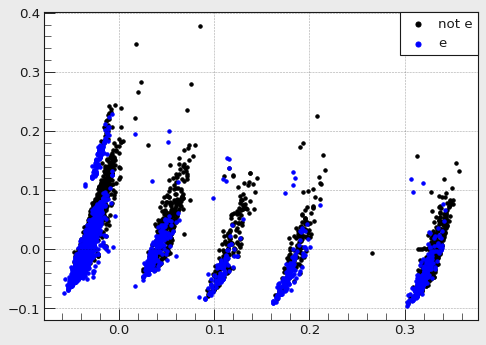

In [59]:
pca = KernelPCA(n_components=2, kernel='rbf').fit_transform(preprocessing.MinMaxScaler().fit_transform(train[imp_keys2[:15]][:10000]))
print(pca)
plt.scatter(*pca[train["Truth"][:10000].values==0].T, color = "k", label = "not e")
plt.scatter(*pca[train["Truth"][:10000].values==1].T, color = "b", label = "e")
plt.legend()
plt.plot()

In [56]:
print(pca.T)

[[-0.28965298 -0.25721647 -0.22209349 ...  0.00144804  0.41030644
   0.63007026]
 [ 0.13601403  0.26231584  0.12528629 ...  0.52894298 -0.15128063
  -0.11175687]]


In [43]:
print(params25, params15)

{'min_child_samples': 399, 'num_leaves': 95} {'min_child_samples': 169, 'num_leaves': 98}


In [36]:
print("gbdt None:", cross_val_score(LGBMClassifier(boosting_type="gbdt", **params25), train[imp_keys2[:15]] , train["Truth"].values, scoring="accuracy", cv = 5).mean())


gbdt None: 0.9427015384615384


{'max_depth': 158, 'min_child_samples': 45, 'num_leaves': 281}


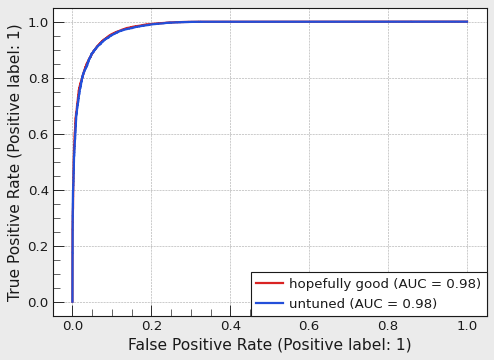

p_sigmad0 0.0226  +/- 0.0002
p_Rphi   0.0139  +/- 0.0000
p_ptconecoreTrackPtrCorrection 0.0119  +/- 0.0003
p_deltaPhiRescaled2 0.0116  +/- 0.0001
p_nTracks 0.0099  +/- 0.0002
p_Reta   0.0093  +/- 0.0001
p_d0     0.0083  +/- 0.0001
p_ambiguityType 0.0078  +/- 0.0001
p_deltaEta1 0.0076  +/- 0.0001
p_ethad  0.0057  +/- 0.0001
p_numberOfPixelHits 0.0057  +/- 0.0001
p_dPOverP 0.0057  +/- 0.0001
p_deltaPhiFromLastMeasurement 0.0056  +/- 0.0002
p_d0Sig  0.0054  +/- 0.0001
p_Rhad   0.0047  +/- 0.0002
p_numberOfInnermostPixelHits 0.0045  +/- 0.0001
p_numberOfSCTHits 0.0034  +/- 0.0001
p_EptRatio 0.0033  +/- 0.0001
p_TRTPID 0.0026  +/- 0.0001
NvtxReco 0.0026  +/- 0.0001
p_Rhad1  0.0025  +/- 0.0001
p_nCells_Lr2_HiG 0.0023  +/- 0.0000
p_deltaPhi2 0.0022  +/- 0.0001
p_pt_track 0.0021  +/- 0.0001
p_E7x11_Lr3 0.0020  +/- 0.0001
p_qOverP 0.0018  +/- 0.0000
p_weta2  0.0016  +/- 0.0001
p_E_Lr2_HiG 0.0016  +/- 0.0001
p_chi2   0.0014  +/- 0.0001
p_maxEcell_time 0.0014  +/- 0.0000
p_z0     0.0014  +/- 0.00

In [160]:
params2, imp_keys2 = optimize_tree_sk_classifier(train[imp_keys[:100]], train["Truth"].values, LGBMClassifier, param_dict_range, pre_process=preprocessing.StandardScaler())

In [182]:
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(preprocessing.StandardScaler().fit_transform(train[imp_keys2[15:]])), train["Truth"], test_size=0.2, random_state=4)
model = LGBMClassifier(**params2)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.9894076923076923
0.9360307692307692


In [174]:
with open("./second_lgbm_model.txt", "w") as f:
    f.write("Parameters used \n")
    f.write(str(imp_keys2[15:]) + "\n")
    f.write("Hyperparameters used \n")
    f.write(str(params2) + "\n")
    f.write("Evaluation on 0.2 \n")
    f.write(str(model.score(X_test, y_test)))

In [129]:
print(5000*160)

800000


In [109]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def DecisionTree_CrossValidation(max_depth, min_samples_leaf, num_leaves, data, targets):
    """Decision Tree cross validation.
       Fits a Decision Tree with the given paramaters to the target 
       given data, calculated a CV accuracy score and returns the mean.
       The goal is to find combinations of max_depth, min_samples_leaf 
       that maximize the accuracy
    """
    
    estimator = LGBMClassifier(random_state=42, 
                                       max_depth=max_depth, 
                                       min_samples_leaf=min_samples_leaf,
                                       num_leaves=num_leaves)
    
    cval = cross_val_score(estimator, data, targets, scoring='accuracy', cv=8)
    
    return cval.mean()

def optimize_DecisionTree(data, targets, pars, n_iter=5):
    """Apply Bayesian Optimization to Decision Tree parameters."""
    
    def crossval_wrapper(max_depth, min_samples_leaf, num_leaves):
        """Wrapper of Decision Tree cross validation. 
           Notice how we ensure max_depth, min_samples_leaf 
           are casted to integer before we pass them along.
        """
        return DecisionTree_CrossValidation(max_depth=int(max_depth), 
                                            min_samples_leaf=int(min_samples_leaf),
                                            num_leaves = int(num_leaves),
                                            data=data, 
                                            targets=targets)

    optimizer = BayesianOptimization(f=crossval_wrapper, 
                                     pbounds=pars, 
                                     random_state=42, 
                                     verbose=2)
    optimizer.maximize(init_points=8, n_iter=n_iter)

    return optimizer

In [21]:
parameters_BayesianOptimization = {"max_depth": (1, 100), 
                                   "min_samples_leaf": (1, 100),
                                   "num_leaves": (10,100)
                                  }
''
BayesianOptimization = optimize_DecisionTree(X_train_sub, 
                                             y_train_sub, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

|   iter    |  target   | max_depth | min_sa... | num_le... |
-------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=95. Current val

In [22]:
params = BayesianOptimization.max["params"]
for param in params:
    params[param] = int(params[param])


In [27]:
model = LGBMClassifier(**params)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=16. Current value: min_data_in_leaf=16
0.9494384615384616
0.9421846153846154


In [28]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9528846153846153
0.9434153846153847


In [25]:
X_test_sub, y_test_sub = X_test[:2000], y_test[:2000]

In [ ]:

r = permutation_importance(model2, X_test_sub, y_test_sub, n_repeats=30, random_state=0)


In [32]:
important_keys = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{model.feature_name_[i]:<8}",
            f"{r.importances_mean[i]:.3f}",
            f" +/- {r.importances_std[i]:.3f}")
            important_keys.append(model.feature_name_[i])

p_ptconecoreTrackPtrCorrection 0.009  +/- 0.002
p_deltaEta1 0.008  +/- 0.002
p_sigmad0 0.007  +/- 0.003
p_Rhad   0.007  +/- 0.002
p_deltaPhiRescaled2 0.007  +/- 0.002
p_Rphi   0.004  +/- 0.002
p_Reta   0.004  +/- 0.002
p_ethad  0.004  +/- 0.002
p_qOverP 0.004  +/- 0.001
p_numberOfSCTHits 0.003  +/- 0.001
p_E7x11_Lr3 0.003  +/- 0.001
p_EptRatio 0.003  +/- 0.001
p_deltaPhi2 0.003  +/- 0.001
p_numberOfPixelHits 0.003  +/- 0.001
p_d0Sig  0.002  +/- 0.001
p_fracs1 0.002  +/- 0.001
p_E7x11_Lr2 0.001  +/- 0.001
p_ndof   0.001  +/- 0.000


In [42]:
train_corr = pd.concat([X_train, y_train], axis = 1).corr()
corr_keys = pd.concat([train_corr["Truth"][:-1].abs().rank(ascending=False), train_corr["Truth"][:-1]], axis = 1, keys = ["rank", "corr"]).sort_values(by = "rank").index[:15]


Index(['p_Reta', 'p_Rphi', 'p_Rhad', 'p_ehad1', 'p_Rhad1', 'p_ethad',
       'p_ethad1', 'p_weta2', 'p_r33over37allcalo', 'p_E7x11_Lr3', 'p_Eratio',
       'p_e2ts1', 'p_e2tsts1', 'p_E7x7_Lr3', 'p_E5x7_Lr3'],
      dtype='object')


In [48]:
X_train, X_test, y_train, y_test = train_test_split(train[important_keys[:15]], train["Truth"], test_size=0.2, random_state=42)

model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9474307692307692
0.94


In [72]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(train[use_keys]), columns=use_keys)
X_train, X_test, y_train, y_test = train_test_split(X, train["Truth"], test_size=0.2, random_state=42)
X_train_sub = X_train.iloc[:5000]
y_train_sub = y_train.iloc[:5000]
X_test_sub = X_test.iloc[:10000]
y_test_sub = y_test.iloc[:10000]

In [69]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9527230769230769
0.9437538461538462


In [75]:

r = permutation_importance(model2, X_test_sub, y_test_sub, n_repeats=30, random_state=0)

In [80]:
important_keys3 = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{model.feature_name_[i]:<8}",
            f"{r.importances_mean[i]:.3f}",
            f" +/- {r.importances_std[i]:.3f}")
            important_keys3.append(model.feature_name_[i])

p_deltaEta1 0.009  +/- 0.001
p_sigmad0 0.007  +/- 0.001
p_ptconecoreTrackPtrCorrection 0.006  +/- 0.001
p_Reta   0.006  +/- 0.001
p_Rhad   0.004  +/- 0.001
p_deltaPhiRescaled2 0.004  +/- 0.001
p_ethad  0.003  +/- 0.001
p_numberOfPixelHits 0.003  +/- 0.000
p_ambiguityType 0.003  +/- 0.001
p_Rphi   0.002  +/- 0.001
p_d0Sig  0.002  +/- 0.001
p_numberOfInnermostPixelHits 0.002  +/- 0.001
p_numberOfSCTHits 0.001  +/- 0.001
p_d0     0.001  +/- 0.000
p_E7x11_Lr3 0.001  +/- 0.000
p_TRTPID 0.001  +/- 0.000
p_EptRatio 0.001  +/- 0.000
p_DeltaE 0.000  +/- 0.000
p_z0     0.000  +/- 0.000
p_f3core 0.000  +/- 0.000
p_maxEcell_energy 0.000  +/- 0.000
p_emins1 0.000  +/- 0.000


In [106]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(train[important_keys3[:15]]), columns=important_keys3[:15])
X_train, X_test, y_train, y_test = train_test_split(X, train["Truth"], test_size=0.2, random_state=42)
X_train_sub = X_train.iloc[:5000]
y_train_sub = y_train.iloc[:5000]
X_test_sub = X_test.iloc[:10000]
y_test_sub = y_test.iloc[:10000]

In [107]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.9473846153846154
0.9392615384615385


In [111]:
parameters_BayesianOptimization = {"max_depth": (1, 100), 
                                   "min_samples_leaf": (1, 300),
                                   "num_leaves": (10,100)
                                  }
''
BayesianOptimization = optimize_DecisionTree(X_train, 
                                             y_train, 
                                             parameters_BayesianOptimization, 
                                             n_iter=5)
print(BayesianOptimization.max)

|   iter    |  target   | max_depth | min_sa... | num_le... |
-------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. 

In [112]:
params_3 = BayesianOptimization.max["params"]
for param in params:
    params_3[param] = int(params_3[param])

In [113]:
model2 = LGBMClassifier(**params_3)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=284. Current value: min_data_in_leaf=284
0.9528538461538462
0.9400615384615385


In [94]:
r = permutation_importance(model2, X_test, y_test, n_repeats=30, random_state=0)

In [95]:
important_keys4 = []

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{model2.feature_name_[i]:<8}",
            f"{r.importances_mean[i]:.3f}",
            f" +/- {r.importances_std[i]:.3f}")
            important_keys4.append(model2.feature_name_[i])

p_sigmad0 0.026  +/- 0.001
p_deltaEta1 0.021  +/- 0.001
p_ptconecoreTrackPtrCorrection 0.008  +/- 0.001
p_Rhad   0.007  +/- 0.001
p_Reta   0.006  +/- 0.001
p_Rphi   0.006  +/- 0.001
p_deltaPhiRescaled2 0.006  +/- 0.001
p_EptRatio 0.004  +/- 0.000
p_ethad  0.004  +/- 0.000
p_E7x11_Lr3 0.003  +/- 0.001
p_d0     0.003  +/- 0.000
p_ambiguityType 0.002  +/- 0.000
p_numberOfPixelHits 0.002  +/- 0.000
p_d0Sig  0.002  +/- 0.000
p_numberOfSCTHits 0.002  +/- 0.000
p_numberOfInnermostPixelHits 0.002  +/- 0.000
p_TRTPID 0.001  +/- 0.000
p_DeltaE 0.001  +/- 0.000
p_maxEcell_energy 0.001  +/- 0.000
p_emins1 0.001  +/- 0.000
p_f3core 0.001  +/- 0.000


In [97]:
X = pd.DataFrame(preprocessing.StandardScaler().fit_transform(train[important_keys4[:15]]), columns=important_keys4[:15])
X_train, X_test, y_train, y_test = train_test_split(X, train["Truth"], test_size=0.2, random_state=42)

In [98]:
model2 = LGBMClassifier()
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

0.948
0.9402153846153846


In [102]:
parameters_BayesianOptimization = {"max_depth": (1, 100), 
                                   "min_samples_leaf": (1, 300),
                                   "num_leaves": (10,100)
                                  }
''
BayesianOptimization = optimize_DecisionTree(X_train, 
                                             y_train, 
                                             parameters_BayesianOptimization, 
                                             n_iter=10)
print(BayesianOptimization.max)

|   iter    |  target   | max_depth | min_sa... | num_le... |
-------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. Current value: min_data_in_leaf=285
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=285. 

In [103]:
params_3 = BayesianOptimization.max["params"]
for param in params:
    params_3[param] = int(params_3[param])

In [104]:
model2 = LGBMClassifier(**params_3)
model2.fit(X_train, y_train)
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=296. Current value: min_data_in_leaf=296
0.9559153846153846
0.9409538461538461


In [7]:
print(train.shape)
print(final_test.shape)

(162500, 166)
(160651, 164)


In [105]:
with open("./first_lgbm_model.txt", "w") as f:
    f.write("Parameters used \n")
    f.write(str(important_keys4[:15]) + "\n")
    f.write("Hyperparameters used \n")
    f.write(str(params_3) + "\n")
    f.write("Evaluation on 0.2 \n")
    f.write(str(model2.score(X_test, y_test)))